<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных-для-обучения-модели" data-toc-modified-id="Подготовка-данных-для-обучения-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных для обучения модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Устранение-дисбаланса-классов" data-toc-modified-id="Устранение-дисбаланса-классов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Устранение дисбаланса классов</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#MultinomialNB-(Naive-Bayes-Classifier)" data-toc-modified-id="MultinomialNB-(Naive-Bayes-Classifier)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MultinomialNB (Naive Bayes Classifier)</a></span></li><li><span><a href="#SGDClassifier-(Linear-Support-Vector-Machine)" data-toc-modified-id="SGDClassifier-(Linear-Support-Vector-Machine)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SGDClassifier (Linear Support Vector Machine)</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение токсичных комментариев

## Описание проекта  

**Заказчик:** Интернет-магазин «Викишоп», запускающий новый сервис, в котором пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. 

**Задача:** Магазину необходим инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. Необходимо обучить модель классификации комментариев на позитивные и негативные. Значение метрики качества *F1* выбранной модели должно быть не меньше 0.75.

**Этапы выполнения проекта:**  
1. Загрузка и изучение данных.
2. Предобработка данных.
3. Подготовка данных для обучения моделей.
4. Обучение различных моделей. 
5. Тестирование лучшей модели
6. Формирование итоговых выводов.

**Описание данных**  
Данные находятся в файле `toxic_comments.csv`. В наборе данных проведена разметка о токсичности правок.  
* Столбец *text* - текст комментария
* Столбец *toxic* — целевой признак

## Загрузка и изучение данных

In [1]:
!pip install imblearn

In [2]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re 
import time

from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import wordnet

from string import punctuation
from wordcloud import (WordCloud,
                      STOPWORDS)

from imblearn.pipeline import Pipeline as Pipeline_2
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV, 
                                     TimeSeriesSplit)
from sklearn.linear_model import (LogisticRegression,
                                  SGDClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

import warnings

Выделим переменные, которые будут использоваться в ходе всего проекта:

In [3]:
RANDOM_STATE = 12345
TEST_SIZE = 0.25
CV = 5

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

STOP_WORDS = nltk_stopwords.words('english')
STOP_WORDS.extend(['\n'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akononyuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akononyuk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akononyuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\akononyuk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
# Задаем количесвто столбцов и ширину столбцов, 
# которые будут выводиться при обращении к датафреймам
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', 100)

# Задаем количество знаков после запятой для всех значений в датафрейме
pd.set_option('float_format', '{:.2f}'.format) 

# Вывести из под комментария перед финальным запуском:
# Игнорируем предупреждения о возможных изменения работы фуфнкций в будущих версиях в Pandas
warnings.filterwarnings("ignore")

In [5]:
# чтение csv-файла
try:
    main_df = pd.read_csv('/datasets/toxic_comments.csv')
except:
    main_df = pd.read_csv('toxic_comments.csv')

In [6]:
# Напишем функцию для отображения общей информации
def info_df(data):
    '''Выводит общую информацию
    '''
    data.info()
    display(data.sample(5))
    if data.duplicated().sum() == 0:
        print("Дубликатов не обнаружено")
    else:
        print("Кол-во полных дубликатов:", data.duplicated().sum())

In [7]:
info_df(main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


,Unnamed: 0,text,toxic
79667,79743,"I think that if the vague tag is added, a citation needed tag should be added to encourage users...",0
67279,67347,Hi myself! This is a test...,0
72733,72804,Ther are not enought differences in the Mark VI and the M-VI to seperate them. The basics are th...,0
115289,115388,It is listed by your own USA government as a propaganda station. So thats that I trust. Nov 23r...,0
35283,35324,"""\n\n Request for comment \n\n \nI am wondering what to do with the second """"paragraph"""" in the ...",0


Дубликатов не обнаружено


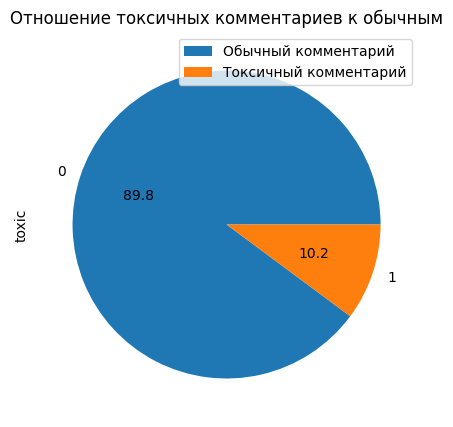

In [8]:
# Отобразим соотношение токсичных комментариев к обычным
main_df['toxic'].value_counts().plot(kind='pie',
                                    autopct='%.1f',
                                    figsize=(5, 5))
plt.legend(['Обычный комментарий', 'Токсичный комментарий'])
plt.title('Отношение токсичных комментариев к обычным');

**Вывод:**  
* Исходный набор данных состоит из более чем 159тыс. значений и 3 столбцов, один из которых повторяет номера индексов
* Полные дубликаты и пропуски в датасете отсутствуют
* Из всего набора данных, кол-во токсичных комментриев составляет чуть более 10%, явный дисбаланс классов
* Из примеров текстов можно сделать вывод, что все тексты на английском языке и в них присутствуют различные спецсимволы

## Предобработка данных

Сделаем копию исходного датасета, чтобы всегда оставалась возможность обратиться к нему в процессе выполнения работы:

In [9]:
df = main_df.copy(deep=True)
df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0
2,2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0
3,3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0
4,4,"You, sir, are my hero. Any chance you remember what page that's on?",0


In [10]:
# Удалим ненужный столбец
del df['Unnamed: 0']
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


Обработаем данные вручную: добавим столбец `processed`, который занесем данные из столбца `text`, но придеведнные к нижнем регистру, очищенные от стопслов и знаков пунктуации.

In [11]:
# Напишем функцию для очистки текста от знаков пунктуации
def remove_marks(text):
    '''
    Очищает текст от знаков пунктуации
    заменяя их пробелами
    '''
    clean_text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    return clean_text

In [12]:
# приведем к нижнему регистру и очистим от знаков пунктуации
df['processed'] = df['text'].apply(lambda x: remove_marks(x.lower()))
# разделим все слова и поместим их в один список
df['processed'] = df['processed'].map(lambda x: x.split(' '))
# Удалим стопслова и знаки пунктуации
df['processed'] = df['processed'].map(lambda x: [token for token in x if token not in STOP_WORDS \
                                                and token != " " \
                                                and token.strip() not in punctuation])
# объединим все слова в списках
df['processed'] = df['processed'].map(lambda x: ' '.join(x))

In [13]:
info_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       159292 non-null  object
 1   toxic      159292 non-null  int64 
 2   processed  159292 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.6+ MB


,text,toxic,processed
98290,""" \n\n """"Destra"""" means """"right"""" (same root as our """"dexterous""""). """"Left"""" in Italian is """"Sin...",0,destra means right root dexterous left italian sinestra actually give translation destra exactly...
21052,"""\n\nCan you tell me how to remove information from the Sigma Sigma Sigma page? As National Ass...",0,tell remove information sigma sigma sigma page national assistant webmaster trying remove entry ...
80431,Unfortunately that article seems to be available only from paid websites at which I don't have a...,0,unfortunately article seems available paid websites subscription give brief quotation part relev...
148491,Wow...funny how i can harass other users by calling them cocksuckers on my own talk page. \n\nTh...,1,wow funny harass users calling cocksuckers talk page concept wikipedia moronic general public st...
66760,Criticisms\n\nThat page has no substantiated claims and has unverifiable information which is fo...,0,criticisms page substantiated claims unverifiable information forbidden wikipedia claims ever ma...


Дубликатов не обнаружено


После получения обработанного текста добавим еще один столбец, в который поместим леммы обработанного. Для этого сначала напишем функцию лемматизации:

In [14]:
lemmatizing = WordNetLemmatizer()

In [15]:
def get_wordnet_pos(word):
    '''Подбирает POS-тег (part-of-speech)'''
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN)

In [16]:
def get_lemma(text):
    '''Лемматизирует входной текст'''
    # Разделим целый текст на токены
    text = text.apply(lambda x: word_tokenize(x))
    # Убираем стопслова
    text = text.apply(lambda x: [word for word in x if not word in STOP_WORDS])
    # Лемматизируем слова
    text = text.apply(lambda x: ' '.join([lemmatizing.lemmatize(w, get_wordnet_pos(w)) for w in x]))
    
    return text

In [17]:
%%time
df['lemmatized'] = get_lemma(df['processed'])

CPU times: total: 51min 19s
Wall time: 51min 28s


Посмотрим на получившийся результат:

In [18]:
info_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        159292 non-null  object
 1   toxic       159292 non-null  int64 
 2   processed   159292 non-null  object
 3   lemmatized  159292 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.9+ MB


,text,toxic,processed,lemmatized
50499,"Sorry \n\nSorry for interupting your guys' catfight, but can someone explain y this article is u...",0,sorry sorry interupting guys catfight someone explain article deletion,sorry sorry interupting guy catfight someone explain article deletion
110172,Who the fuck is saying ths to me...? How is any of what I put disruptive? If this is person or b...,1,fuck saying ths put disruptive person bot go fuck,fuck say th put disruptive person bot go fuck
61866,"""\n\n A barnstar for you! \n\n The Teamwork Barnstar For an awesome invitation to wikipedia and...",0,barnstar teamwork barnstar awesome invitation wikipedia lot people like thank,barnstar teamwork barnstar awesome invitation wikipedia lot people like thank
66301,I feel I ought to say that I shall no longer attempt to put far-right on the page as there seems...,0,feel ought say shall longer attempt put far right page seems consensus right wing seems appropri...,feel ought say shall longer attempt put far right page seem consensus right wing seem appropriat...
52116,(That'll show 'em)\n\nBwa ha ha ha ha ha ha!\n\ntee hee\n\n(giggle)\n\n(snicker)\n\nzzzzzzzzzzzz...,0,show em bwa ha ha ha ha ha ha tee hee giggle snicker zzzzzzzzzzzzzzzzzzzzz,show em bwa ha ha ha ha ha ha tee hee giggle snicker zzzzzzzzzzzzzzzzzzzzz


Дубликатов не обнаружено


Напишем функции для визуализации облаков слов:

In [19]:
def get_corpus(data):
    '''
    Возвращает список всех слов в корпусе
    '''
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    
    return corpus

In [20]:
def get_str_corpus(corpus):
    '''
    Возвращает текстовую строку из списка слов
    '''
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    # Обрежем строку с обоих концов
    str_corpus = str_corpus.strip()
    
    return str_corpus

In [21]:
def get_word_cloud(corpus):
    '''
    Возвращает облако из 200 наиболее частых слов из корпуса
    '''
    word_cloud = WordCloud(background_color='white',
                          stopwords=STOP_WORDS,
                          width=3000,
                          height=2500,
                          max_words=200,
                          random_state=RANDOM_STATE).generate(get_str_corpus(corpus))
    
    return word_cloud

In [22]:
def plot_word_cloud(data, title):
    '''
    Отображает облако слов
    '''
    # Получим список всех слов
    corpus = get_corpus(data.values)
    # Получим облако слов
    word_cloud = get_word_cloud(corpus)
    fig = plt.figure(figsize=(30,30))
    
    plt.subplot(1, 2, 1)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.subplot(1, 2, 1)
    plt.title(title, fontsize= 30, loc='center', pad=10)
    plt.show()
    print('Кол-во уникальных слов: ', len(corpus))

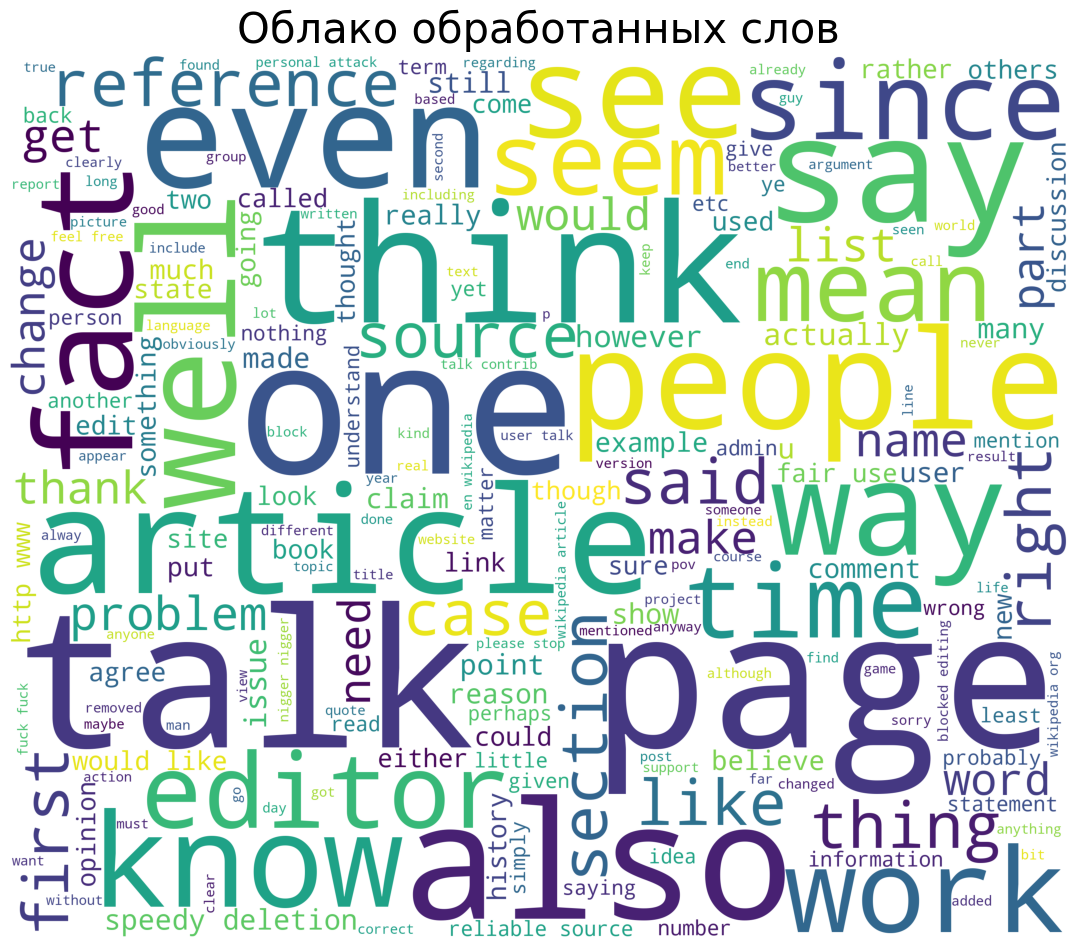

Кол-во уникальных слов:  5521677


In [23]:
plot_word_cloud(df['processed'], 'Облако обработанных слов')

In [24]:
# Сформируем набор данных только из токсичных комментариев
toxic_text = df.loc[df['toxic'] == 1]

# Сформируем набор данных только из обычных комментариев
common_text = df.loc[df['toxic'] == 0]

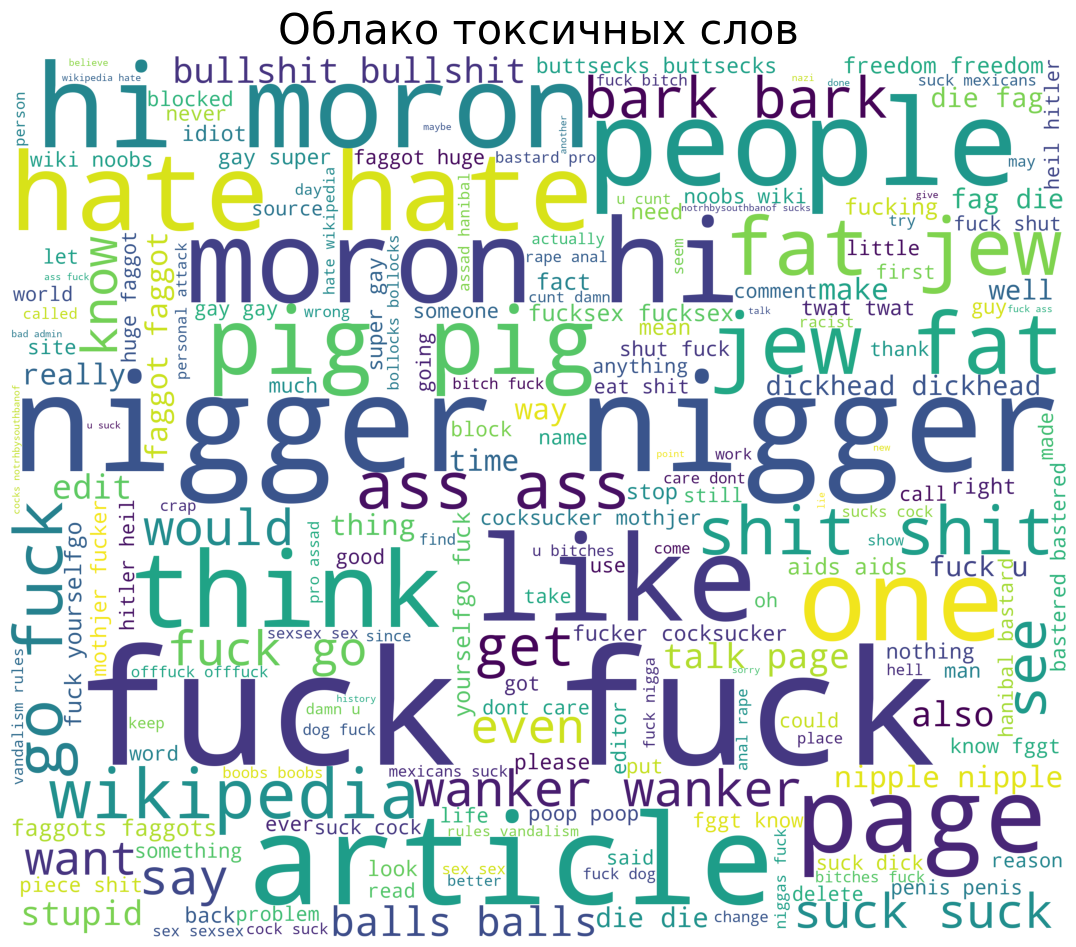

Кол-во уникальных слов:  464142


In [25]:
plot_word_cloud(toxic_text['processed'], 'Облако токсичных слов')

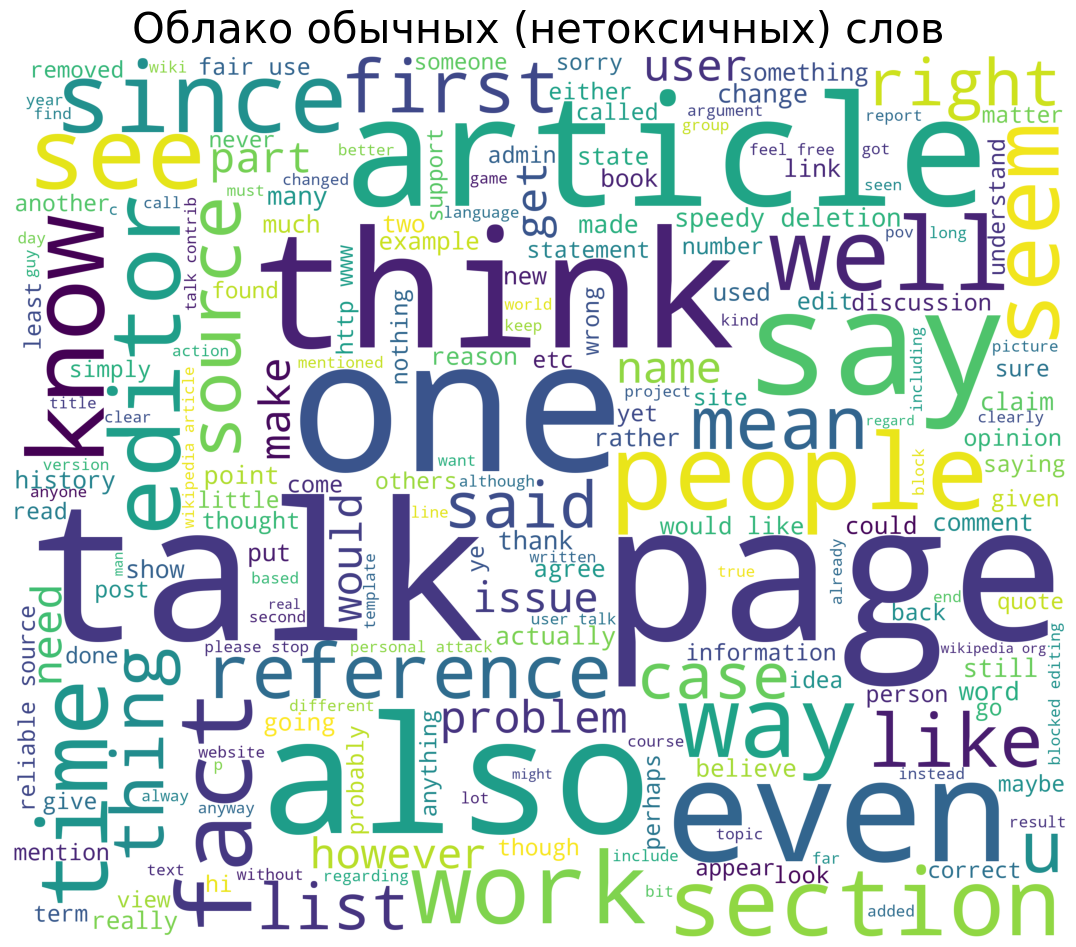

Кол-во уникальных слов:  5057535


In [26]:
plot_word_cloud(common_text['processed'], 'Облако обычных (нетоксичных) слов')

**Вывод:**  
* Скопировали исходный набор данных и удалили из него столбец, повторяющий индексы;
* На основе исходных комментариев добавили еще 2 столбца:
    * столбец `processed` - в котором привели данные к нижнему регистру, очистили от стопслов и знаков пунктуации
    * столбец `lemmatized` - в котором произвели лемматизацию очищенного текста
* Построили 3 облака слов:
    * общее облако слов (общее кол-во уникальных слов 5 521 677)
    * облако слов из токсичных комментариев (общее кол-во уникальных слов 464 142)
    * облако слов из обычных комментариев (общее кол-во уникальных слов 5 057 535)

## Подготовка данных для обучения модели

### Подготовка признаков

In [27]:
# Выделим признаки и целевой признак
features = df['lemmatized']
target = df['toxic']

In [28]:
# Разделим выборку на обучающую и тестовую
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features, 
                                target, 
                                random_state=RANDOM_STATE,
                                test_size=TEST_SIZE)

print('Размер признаков обучающей выборки: ', features_train.shape)
print('Размер целевого признака обучающей выборки: ', target_train.shape)
print('Размер признаков тестовой выборки: ', features_test.shape)
print('Размер целевого признака тестовой выборки: ', target_test.shape)

Размер признаков обучающей выборки:  (119469,)
Размер целевого признака обучающей выборки:  (119469,)
Размер признаков тестовой выборки:  (39823,)
Размер целевого признака тестовой выборки:  (39823,)


### Устранение дисбаланса классов

Устранять дисбаланс классов будем путем апсемплирования (увеличения выборки меньшего класса)

In [29]:
def upsampling(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, 
                                                   target_upsampled,
                                                   random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

In [30]:
# Т.к. ранее выявили, что отношение классов при дисбалансе равно 1:9, 
# то будем использовать 9 повторов
(features_train_up,
 target_train_up) = upsampling(features_train,
                               target_train,
                               repeat=9)

In [31]:
target_train_up.value_counts()

1    109278
0    107327
Name: toxic, dtype: int64

## Обучение моделей

Обучать будем 5 различных моделей:
1. `MultinomialNB` (*Naive Bayes Classifier*)
2. `SGDClassifier` (*Linear Support Vector Machine*) 
3. `LogisticRegression`
4. `RandomForestClassifier`  

Модель `MultinomialNB` будем обучать на выборке со сбалансированными ранее классами методом *upsampling*. Остальные модели будем обучать при помощи гиперпараметра `class_weight='balanced'`.

Векторизацию текста выболним при помощи `Tfidfvectorizer`.  

Качество работы моделей будем оценивать кросс-валидацией.

In [32]:
# Напишем функцию анализа работы моделей
def model_analyze(model, parameters, features_train, target_train):
    '''
    Принимает на вход объявленную модель обучения,
    сетку параметров, признаки и целевой признак.
    Выводит время обучения, время предсказания и
    наилучшее значение метрики
    '''
    # Объявим сетку
    grid = GridSearchCV(model,
                        param_grid=parameters,
                        cv=CV,
                        n_jobs=-1,
                        scoring='f1',
                        verbose=1)
    # Обучим модель
    grid.fit(features_train, target_train)
        
    start_predict = time.time()
    predict = grid.predict(features_train)
    # Зафиксируем время предсказания
    time_predict = time.time() - start_predict
    
    # Рассчитаем значение метрики
    model_results = [grid.refit_time_, time_predict, grid.best_score_]
    print(model)
    print('Время обучения модели с лучшими параметрами:', grid.refit_time_)
    print('Время предсказания:', time_predict)
    print('Лучший результат f1:', grid.best_score_)
    
    return model_results, grid

### MultinomialNB (Naive Bayes Classifier)

In [33]:
# Объявим модель
model_nb = Pipeline_2([('vect', TfidfVectorizer()),
                       ('clf', MultinomialNB())])

In [34]:
# Зададим сетку параметров
parameters_nb = {'vect__stop_words': [None, STOP_WORDS]}

In [35]:
(results_nb,
 grid_nb) = model_analyze(model_nb,
                          parameters_nb,
                          features_train,
                          target_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', MultinomialNB())])
Время обучения модели с лучшими параметрами: 3.6436216831207275
Время предсказания: 3.8766908645629883
Лучший результат f1: 0.347797400415458


### SGDClassifier (Linear Support Vector Machine)

In [36]:
# Объявим модель
model_sgd = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', SGDClassifier(random_state=RANDOM_STATE,
                                            max_iter=1000,
                                            class_weight='balanced'))])

In [37]:
# Зададим сетку параметров
parameters_sgd = {'vect__stop_words': [None, STOP_WORDS],
                  'clf__loss': ['hinge', 'log', 'modified_huber'],
                  'clf__learning_rate': ['optimal', 'adaptive'],
                  'clf__eta0': [0.1, 0.5]}

In [38]:
(results_sgd,
 grid_sgd) = model_analyze(model_sgd,
                           parameters_sgd,
                           features_train,
                           target_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 SGDClassifier(class_weight='balanced', random_state=12345))])
Время обучения модели с лучшими параметрами: 5.193836688995361
Время предсказания: 3.2710535526275635
Лучший результат f1: 0.7505914111384905


### LogisticRegression

In [39]:
# Объявим модель
model_lr = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', LogisticRegression(random_state=RANDOM_STATE,
                                              class_weight='balanced'))])

In [40]:
# Зададим сетку параметров
parameters_lr = {'vect__stop_words': [None, STOP_WORDS],
                 'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'clf__penalty': [None, 'l2', 'l1', 'elasticnet'],
                 'clf__C': [0.5, 1.0, 1.5]}

In [41]:
(results_lr,
 grid_lr) = model_analyze(model_lr,
                          parameters_lr,
                          features_train,
                          target_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(class_weight='balanced',
                                    random_state=12345))])
Время обучения модели с лучшими параметрами: 8.498527765274048
Время предсказания: 4.827513694763184
Лучший результат f1: 0.751979316466362


### RandomForestClassifier

In [42]:
# Объявим модель
model_rf = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', RandomForestClassifier(random_state=RANDOM_STATE,
                                                    class_weight='balanced'))])

In [43]:
# Зададим сетку параметров
parameters_rf = {'vect__stop_words': [None, STOP_WORDS],
                 'clf__n_estimators': [10, 30, 50],
                 'clf__max_depth': [1, 5, 10]}

In [44]:
(results_rf,
 grid_rf) = model_analyze(model_rf,
                          parameters_rf,
                          features_train,
                          target_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=12345))])
Время обучения модели с лучшими параметрами: 6.2421276569366455
Время предсказания: 4.653279781341553
Лучший результат f1: 0.36151231947997164


## Тестирование лучшей модели

Чтобы определить лучшую модель, сведем показатели всех моделей в единую таблицу:

In [45]:
results = pd.DataFrame([results_nb, results_sgd, results_lr, results_rf],
                      columns=['Время обучения', 'Время предсказания', 'Лучший результат f1'],
                      index=['MultinomialNB', 'SGDClassifier', 'LogisticRegression', 'RandomForestClassifier'])
results.round(4)

,Время обучения,Время предсказания,Лучший результат f1
MultinomialNB,3.64,3.88,0.35
SGDClassifier,5.19,3.27,0.75
LogisticRegression,8.50,4.83,0.75
RandomForestClassifier,6.24,4.65,0.36


Наилуший результат метрики качества *f1* показала модель `SGDClassifier`. Проверим качество первой модели на тестовой выборке.

In [46]:
# Получим предсказания лучшей модели на тестовой выборке
predict_test = grid_sgd.predict(features_test)

In [47]:
# Посчитаем f1-score
f1_test = f1_score(target_test, predict_test)
print('f1 тестовой выборки:', f1_test.round(4))

f1 тестовой выборки: 0.7572


## Общий вывод

В ходе работы над проектом провели следующие шаги:
* Загрузили данные и исследовали их: 
    * Выявили соотношение токсичных комментариев к обучным
    * Добавили столбцы с очищенными данными и лемматизированными комментариями
    * Выделили наиболее частые слова из токсичных комментариев и из обычных
* Подготовили данные для обучения:
    * Разделили исходную выборку на обучающую и тестовую
    * Устранили дисбаланс классов методом *upsampling*
* Обучили 4 модели на обучающей выборке и проверили работу лучшей модели на тестовой выборке.
    * Наилучший результат, удовлетворяющий требованию не менее 0.75 на тестовой выборке показала модель `SGDClassifier`.
    
Рекомендуется магазину "Викишоп" ставить фильтр комментариев для избегания оставления комментариев только из знаков препинания/цифр/стопслов, а также ограничивать длину комментариев.

Для улучшения показателей качества можно сделать следующее:
* Подобрать более точные гиперпараметры для улучшения результата
* Провести векторизацию методом *BERT*. Это потребует серьёзных вычислительных мощностей